# The Curse of Dimensionality

In this article, we will not talk about how to deal with high dimension data, but do some brief analysis of the properties of high dimensionality.  
### Naive approach
The space increase exponentially via the dimension. It's naive for us to devide the space into cells. Because it needs large amount of training data, otherwise many cells will be empty.  
### Parameters
Think of the example of polynomial curve fitting in high dimension space. If we have $D$ (for dimension) input variables, then a general polynomial with coefficients up to order 3 would take the form  
$$y(\mathbf{x},\mathbf{w})=w_0+\sum_{i=1}^Dw_ix_i+\sum_{i=1}^D\sum_{j=1}^Dw_{ij}x_ix_j+\sum_{i=1}^D\sum_{j=1}^D\sum_{k=1}^Dw_{ijk}x_ix_jx_k$$
As $D$ increses, so the number of independent coefficients grows proportionally to $D^3$. For a polynomial of order $M$, the growth in the number of coefficients is like $D^M$. These rapidly growth limits the pratical utility.  

### Volume
Consider a sphere of radius $r=1$ in space of $D$ dimensions. Comparing the disk formular in 2D and the sphere formular in 3D. The volume the sphere in $D$ dimensions must scale as $r^D$, so we write  
$$V_D(r)=K_Dr^D$$
The required fraction between the sphere of radius $r=1$ and the sphere of radius $r=1-\epsilon$ is given by  
$$\frac{V_D(1)-V_D(1-\epsilon)}{V_D(1)}=1-(1-\epsilon)^D$$
For large $D$, this fraction tends to 1 even for small $\epsilon$. Thus, in spaces of high dimensionality, most of the volume of a sphere is concentrated in a thin shell near the surface!  
If we convert the Gaussian distribution from Cartesian to polar coordinates, then integrate out the directional variables, we obtain an expression for the density $p(r)$ as a function of radius $r$ from the origin. $p(r)\Delta r$ is the probability mass inside a thin shell of thickness $\Delta r$ located at radius $r$. For large $D$ the probability mass of the Gaussian is concentrated in a thin shell, and the biggest mass point is leaving far from the orign. (See 2D Gaussian below)

# 2D Gaussian distribution
Each segment has the same diffrence of radius. Although the most probably point is still the point of mean. In contrast, if we integrate the distribution of segments, we will get the opposite result. From the figure we can see, the segment from radius 0.5 to 1.0 has the biggest volume, which gives biggest probability. 

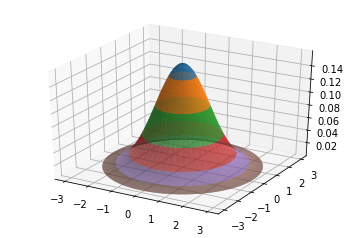

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

MU = [0.0,0.0]
SIGMA = [1.0,1.0]
gaussian = lambda x,y: 1.0/(2*np.pi*SIGMA[0]*SIGMA[1]) \
           * np.exp(-(((x-MU[0])**2 / (2 * SIGMA[0]**2)) + ((y-MU[1])**2 / (2 * SIGMA[1]**2))))

def GaussianSlice(start, end):
    radius = np.linspace(start, end, 100)
    angle = np.linspace(0, 2*np.pi, 100)

    R, A = np.meshgrid(radius, angle)
    X, Y = R*np.sin(A), R*np.cos(A)
    Z = gaussian(X,Y)
    ax.plot_surface(X, Y, Z)    

def main():
    for i in range(6):
        s = 1.0 * i / 2
        e = 1.0 * (i+1) / 2
        GaussianSlice(s,e)
    
if __name__ == "__main__":
    main()